In [3]:
#import the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn import metrics
import statsmodels.api as sm
from sklearn.feature_selection import chi2
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn import tree
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

In [4]:
#input Data 
df=pd.read_spss("C:/Users/USER/OneDrive/Desktop/Mamun Sir Project/Age at Early Marrige/Age at early Marriage.sav")

In [5]:
#overview of the data 
df.head()

,Respondent_current_age,Division,Types_of_place_of_residence,Highest_educational_level,Religion,Literacy,Husband_desire_for_children,Exposure,Husband_education_level,Respondent_currently_working,Weath_index_combined,Age_at_first_birth,Current_contraceptive_method,Ideal_number_of_children,Husband_age,Age_at_first_marriage,Occupation_of_husband
0,46-49,Barisal,Urban,Secondary,Islam,can not read at all,Husband wants fewer,Fecund,Primary,No,Middle,12-20,Traditional Method,2 or less,17-30,Early marriage,Proffesional
1,46-49,Sylhet,Rural,No education,Islam,can not read at all,Don't know,Fecund,Primary,No,Richer,12-20,No Method,2 or less,31-50,Early marriage,Did not work
2,46-49,Sylhet,Rural,Primary,Islam,can not read at all,Husband wants fewer,Fecund,Primary,No,Richer,12-20,Traditional Method,3 or more,31-50,Late marriage,Did not work
3,46-49,Barisal,Rural,Higher,Islam,can not read at all,Both want same,Fecund,Higher,No,Richest,12-20,Traditional Method,2 or less,31-50,Early marriage,Did not work
4,46-49,Rajshahi,Urban,No education,Islam,can not read at all,Both want same,Fecund,No education,Yes,Richer,12-20,No Method,2 or less,31-50,Early marriage,Did not work


In [6]:
#df_csv=pd.read_csv("C:/Users/USER/OneDrive/Desktop/Mamun Sir Project/Age at Early Marrige/Age at early Marriage.csv")

In [7]:
#df_csv.head()

In [8]:
# df_csv is an object of pandas's class and the isnull , Sum is the method under the class 
df.isnull().sum()

Respondent_current_age          0
Division                        0
Types_of_place_of_residence     0
Highest_educational_level       0
Religion                        0
Literacy                        0
Husband_desire_for_children     0
Exposure                        0
Husband_education_level         0
Respondent_currently_working    0
Weath_index_combined            0
Age_at_first_birth              0
Current_contraceptive_method    0
Ideal_number_of_children        0
Husband_age                     0
Age_at_first_marriage           0
Occupation_of_husband           0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15943 entries, 0 to 15942
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Respondent_current_age        15943 non-null  category
 1   Division                      15943 non-null  category
 2   Types_of_place_of_residence   15943 non-null  category
 3   Highest_educational_level     15943 non-null  category
 4   Religion                      15943 non-null  category
 5   Literacy                      15943 non-null  category
 6   Husband_desire_for_children   15943 non-null  category
 7   Exposure                      15943 non-null  category
 8   Husband_education_level       15943 non-null  category
 9   Respondent_currently_working  15943 non-null  category
 10  Weath_index_combined          15943 non-null  category
 11  Age_at_first_birth            15943 non-null  category
 12  Current_contraceptive_method  15943 non-null  

In [10]:
for i in df.columns:
    print(df[i].unique())

['46-49', '41-45', '36-40', '31-35', '26-30', '21-25', '15-20']
Categories (7, object): ['15-20', '21-25', '26-30', '31-35', '36-40', '41-45', '46-49']
['Barisal', 'Sylhet', 'Rajshahi', 'Dhaka', 'Mymensingh', 'Chittagong', 'Rangpur', 'Khulna']
Categories (8, object): ['Barisal', 'Chittagong', 'Dhaka', 'Khulna', 'Mymensingh', 'Rajshahi', 'Rangpur', 'Sylhet']
['Urban', 'Rural']
Categories (2, object): ['Rural', 'Urban']
['Secondary', 'No education', 'Primary', 'Higher']
Categories (4, object): ['Higher', 'No education', 'Primary', 'Secondary']
['Islam', 'Hinduism', 'Buddhism', 'Christianity']
Categories (4, object): ['Buddhism', 'Christianity', 'Hinduism', 'Islam']
['can not read at all', 'Able to read only parts of sentence', 'Able to read Whole sentence']
Categories (3, object): ['Able to read Whole sentence', 'Able to read only parts of sentence', 'can not read at all']
['Husband wants fewer', 'Don't know', 'Both want same', 'Husband wants more']
Categories (4, object): ['Both want sa

In [11]:
#Check the duplicates
df.duplicated().sum()

1251

In [12]:
#Dropping the duplicates
df.drop_duplicates(inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14692 entries, 0 to 15941
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Respondent_current_age        14692 non-null  category
 1   Division                      14692 non-null  category
 2   Types_of_place_of_residence   14692 non-null  category
 3   Highest_educational_level     14692 non-null  category
 4   Religion                      14692 non-null  category
 5   Literacy                      14692 non-null  category
 6   Husband_desire_for_children   14692 non-null  category
 7   Exposure                      14692 non-null  category
 8   Husband_education_level       14692 non-null  category
 9   Respondent_currently_working  14692 non-null  category
 10  Weath_index_combined          14692 non-null  category
 11  Age_at_first_birth            14692 non-null  category
 12  Current_contraceptive_method  14692 non-null  

# Feature Engineering

# Encoding

In [14]:
for i in df.columns:
   a=df[i].nunique()
   print(i,    a)

Respondent_current_age 7
Division 8
Types_of_place_of_residence 2
Highest_educational_level 4
Religion 4
Literacy 3
Husband_desire_for_children 4
Exposure 4
Husband_education_level 5
Respondent_currently_working 2
Weath_index_combined 5
Age_at_first_birth 3
Current_contraceptive_method 3
Ideal_number_of_children 2
Husband_age 3
Age_at_first_marriage 2
Occupation_of_husband 2


Ordinal Encoding : 11 columns

Highest_educational_level, 
Literacy, 
Husband_education_level, 
Respondent_currently_working, 
Weath_index_combined, 
Occupation_of_husband , 
Ideal_number_of_children , 
Occupation_of_husband,
Husband_age,
Respondent_current_age



One hot encoding : 6 columns

Division ,

Types_of_place_of_residence  ,
Religion ,  

Husband_desire_for_children , 

Exposure  , 

Current_contraceptive_method , 


Label Encoding: 1 column

Age_at_first_marriage

# Ordinal Encoding

In [16]:
# Separate features and target
X= df.drop('Age_at_first_marriage', axis=1)
y = df['Age_at_first_marriage']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
df.Occupation_of_husband.unique()

['Proffesional', 'Did not work']
Categories (2, object): ['Did not work', 'Proffesional']

In [18]:
# Ordinalencoding ->
oe = OrdinalEncoder(categories=[['No education','Primary','Secondary','Higher'],['can not read at all', 'Able to read only parts of sentence', 'Able to read Whole sentence'],[ 'Don\'t know','No education','Primary','Secondary','Higher'],['No', 'Yes'],[ 'Poorer', 'Poorest','Middle', 'Richer', 'Richest',],['2 or less', '3 or more'],['Proffesional', 'Did not work'],['17-30', '31-50', 'more than 50'],['46-49', '41-45', '36-40', '31-35', '26-30', '21-25', '15-20']]).set_output(transform='pandas')
X_train_cough = oe.fit_transform(X_train[['Highest_educational_level','Literacy','Husband_education_level','Respondent_currently_working','Weath_index_combined','Ideal_number_of_children','Occupation_of_husband','Husband_age','Respondent_current_age']])

# also the test data
X_test_cough = oe.fit_transform(X_test[['Highest_educational_level','Literacy','Husband_education_level','Respondent_currently_working','Weath_index_combined','Ideal_number_of_children','Occupation_of_husband','Husband_age','Respondent_current_age']])

X_train_cough

,Highest_educational_level,Literacy,Husband_education_level,Respondent_currently_working,Weath_index_combined,Ideal_number_of_children,Occupation_of_husband,Husband_age,Respondent_current_age
11459,1.0,2.0,2.0,0.0,3.0,0.0,0.0,1.0,5.0
13156,2.0,2.0,4.0,1.0,2.0,0.0,0.0,2.0,5.0
771,2.0,0.0,2.0,1.0,4.0,0.0,0.0,1.0,0.0
8249,1.0,2.0,2.0,1.0,1.0,1.0,0.0,1.0,4.0
3828,2.0,0.0,2.0,1.0,0.0,0.0,1.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...
5525,2.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,3.0
14571,2.0,2.0,1.0,1.0,0.0,1.0,0.0,1.0,6.0
5726,2.0,1.0,2.0,1.0,0.0,0.0,1.0,1.0,3.0
901,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


# One hot encoding

In [19]:
# OneHotEncoding -> Division ,  Types_of_place_of_residence  ,Religion ,  Husband_desire_for_children ,  Exposure  , Current_contraceptive_method ,

ohe = OneHotEncoder(drop='first',sparse_output=False).set_output(transform='pandas')
X_train_gender_city = ohe.fit_transform(X_train[['Division','Types_of_place_of_residence','Religion','Husband_desire_for_children','Exposure','Current_contraceptive_method']])

# also the test data
X_test_gender_city = ohe.fit_transform(X_test[['Division','Types_of_place_of_residence','Religion','Husband_desire_for_children','Exposure','Current_contraceptive_method']])

X_train_gender_city

,Division_Chittagong,Division_Dhaka,Division_Khulna,Division_Mymensingh,Division_Rajshahi,Division_Rangpur,Division_Sylhet,Types_of_place_of_residence_Urban,Religion_Christianity,Religion_Hinduism,Religion_Islam,Husband_desire_for_children_Don't know,Husband_desire_for_children_Husband wants fewer,Husband_desire_for_children_Husband wants more,"Exposure_Infecund, menopausal",Exposure_Postpartum amenorrheic,Exposure_Pregnant,Current_contraceptive_method_No Method,Current_contraceptive_method_Traditional Method
11459,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
13156,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
771,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8249,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3828,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5525,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
14571,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
5726,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
901,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# Label encoding

In [20]:
# 0-Early 
# 1-Late

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(y_train)
le.classes_

array(['Early marriage', 'Late marriage'], dtype=object)

In [21]:
y_train = le.transform(y_train)
y_test = le.transform(y_test)
y_train=pd.DataFrame(y_train)
y_test=pd.DataFrame(y_test)

# Concate the Columns 

In [22]:
x_train=pd.concat([X_train_cough,X_train_gender_city],axis=1)
x_test=pd.concat([X_test_cough,X_test_gender_city],axis=1)

# Making DataFrame

In [23]:
total_X=pd.concat([x_train,x_test])
total_y=pd.concat([y_train,y_test])
total_y.rename(columns = {0:'Age at Early Marrige'}, inplace = True) 

In [24]:
total_y.info()
total_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14692 entries, 0 to 2938
Data columns (total 1 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Age at Early Marrige  14692 non-null  int32
dtypes: int32(1)
memory usage: 172.2 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 14692 entries, 11459 to 11451
Data columns (total 28 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Highest_educational_level                        14692 non-null  float64
 1   Literacy                                         14692 non-null  float64
 2   Husband_education_level                          14692 non-null  float64
 3   Respondent_currently_working                     14692 non-null  float64
 4   Weath_index_combined                             14692 non-null  float64
 5   Ideal_number_of_children                  

In [25]:
total_y.value_counts()

Age at Early Marrige
0                       12498
1                        2194
dtype: int64

# Oversampling 

In [26]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
X_before_oversampled_train, X_before_oversampled_test, y_before_oversampled_train, y_before_oversampled_test = train_test_split(total_X,total_y, test_size=0.3, random_state=0)

In [27]:
X_before_oversampled_train

,Highest_educational_level,Literacy,Husband_education_level,Respondent_currently_working,Weath_index_combined,Ideal_number_of_children,Occupation_of_husband,Husband_age,Respondent_current_age,Division_Chittagong,...,Religion_Hinduism,Religion_Islam,Husband_desire_for_children_Don't know,Husband_desire_for_children_Husband wants fewer,Husband_desire_for_children_Husband wants more,"Exposure_Infecund, menopausal",Exposure_Postpartum amenorrheic,Exposure_Pregnant,Current_contraceptive_method_No Method,Current_contraceptive_method_Traditional Method
3594,1.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2797,1.0,0.0,2.0,1.0,3.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9061,2.0,2.0,3.0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
486,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3457,2.0,0.0,2.0,0.0,2.0,0.0,0.0,1.0,2.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10767,0.0,2.0,3.0,1.0,3.0,0.0,0.0,2.0,4.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1899,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
8183,2.0,2.0,3.0,0.0,1.0,0.0,0.0,1.0,4.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
11804,3.0,2.0,2.0,1.0,2.0,0.0,0.0,0.0,5.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [28]:
import imblearn.over_sampling as sm

# Assuming your data is already preprocessed
X_train = X_before_oversampled_train.astype('int')
y_train = y_before_oversampled_train

# Create an SMOTE instance with a random seed for reproducibility
smo = sm.SMOTE(random_state=2)

# Oversample the data using SMOTE
X_train_oversampled, y_train_oversampled=smo.fit_resample(X_train, y_train)

In [29]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_oversampled.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_oversampled.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(np.sum(y_train_oversampled == 1))) 
print("After OverSampling, counts of label '0': {}".format(np.sum(y_train_oversampled == 1))) 

After OverSampling, the shape of train_X: (17514, 28)
After OverSampling, the shape of train_y: (17514, 1) 

After OverSampling, counts of label '1': Age at Early Marrige    8757
dtype: int64
After OverSampling, counts of label '0': Age at Early Marrige    8757
dtype: int64


# Multicolinearity

In [30]:
X_Feature_Selection=total_X
y_Feature_Selection=total_y
y_Feature_Selection.rename(columns = {0:'Age at Early Marrige'}, inplace = True) 

In [31]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train_Feature_Selection, X_test_Feature_Selection, y_train_Feature_Selection, y_test_Feature_Selection = train_test_split(X_Feature_Selection, y_Feature_Selection, test_size=0.3, random_state=0)

[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (1.0, 1.0, 0.6),
 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392)]

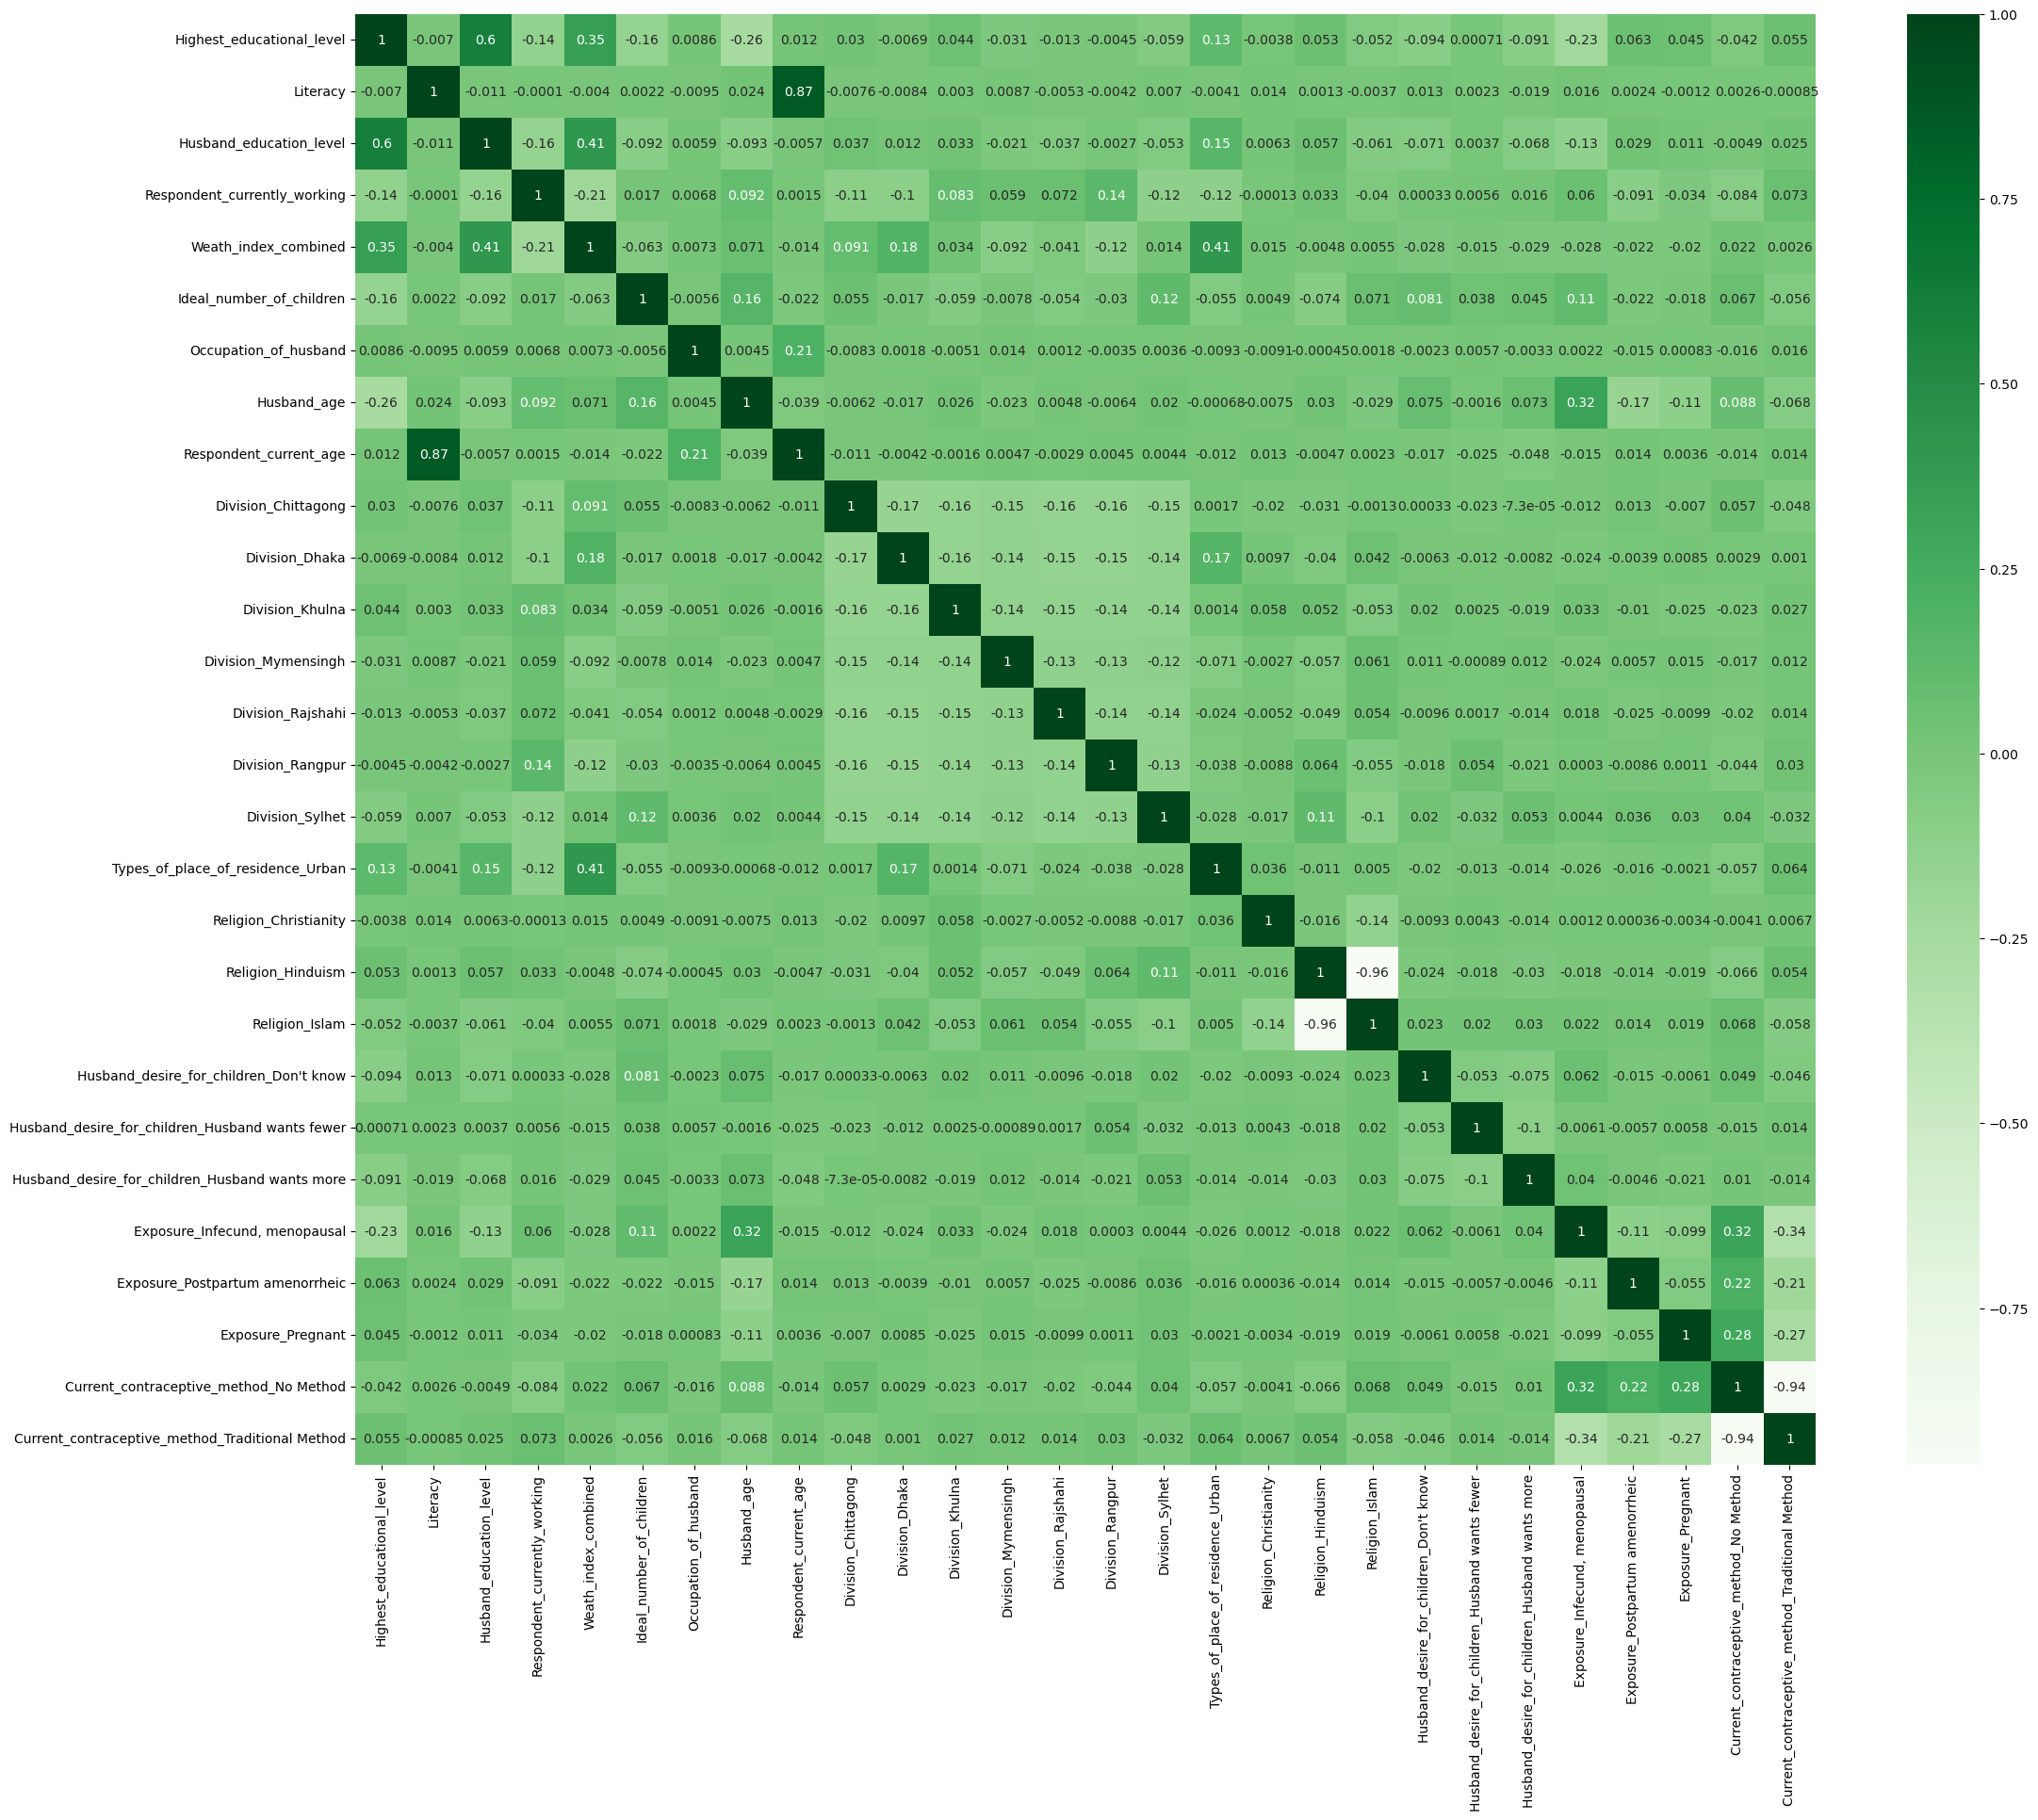

In [32]:
#Multicolinearity Test 
plt.figure(figsize=(25,20))
sns.heatmap(X_Feature_Selection.corr(),cmap="Greens", annot=True)
sns.color_palette("Paired")

# Lasso Feature selection 

In [33]:
# parameters to be tested on GridSearchCV
params = {"alpha":np.arange(0.00001, 10, 500)}

# Number of Folds and adding the random state for replication
kf=KFold(n_splits=30,shuffle=True, random_state=1)

# Initializing the Model
lasso = Lasso()

# GridSearchCV with model, params and folds.
lasso_cv=GridSearchCV(lasso, param_grid=params, cv=kf)
lasso_cv.fit(X_train_Feature_Selection,y_train_Feature_Selection)
print("Best Params {}".format(lasso_cv.best_params_))

Best Params {'alpha': 1e-05}


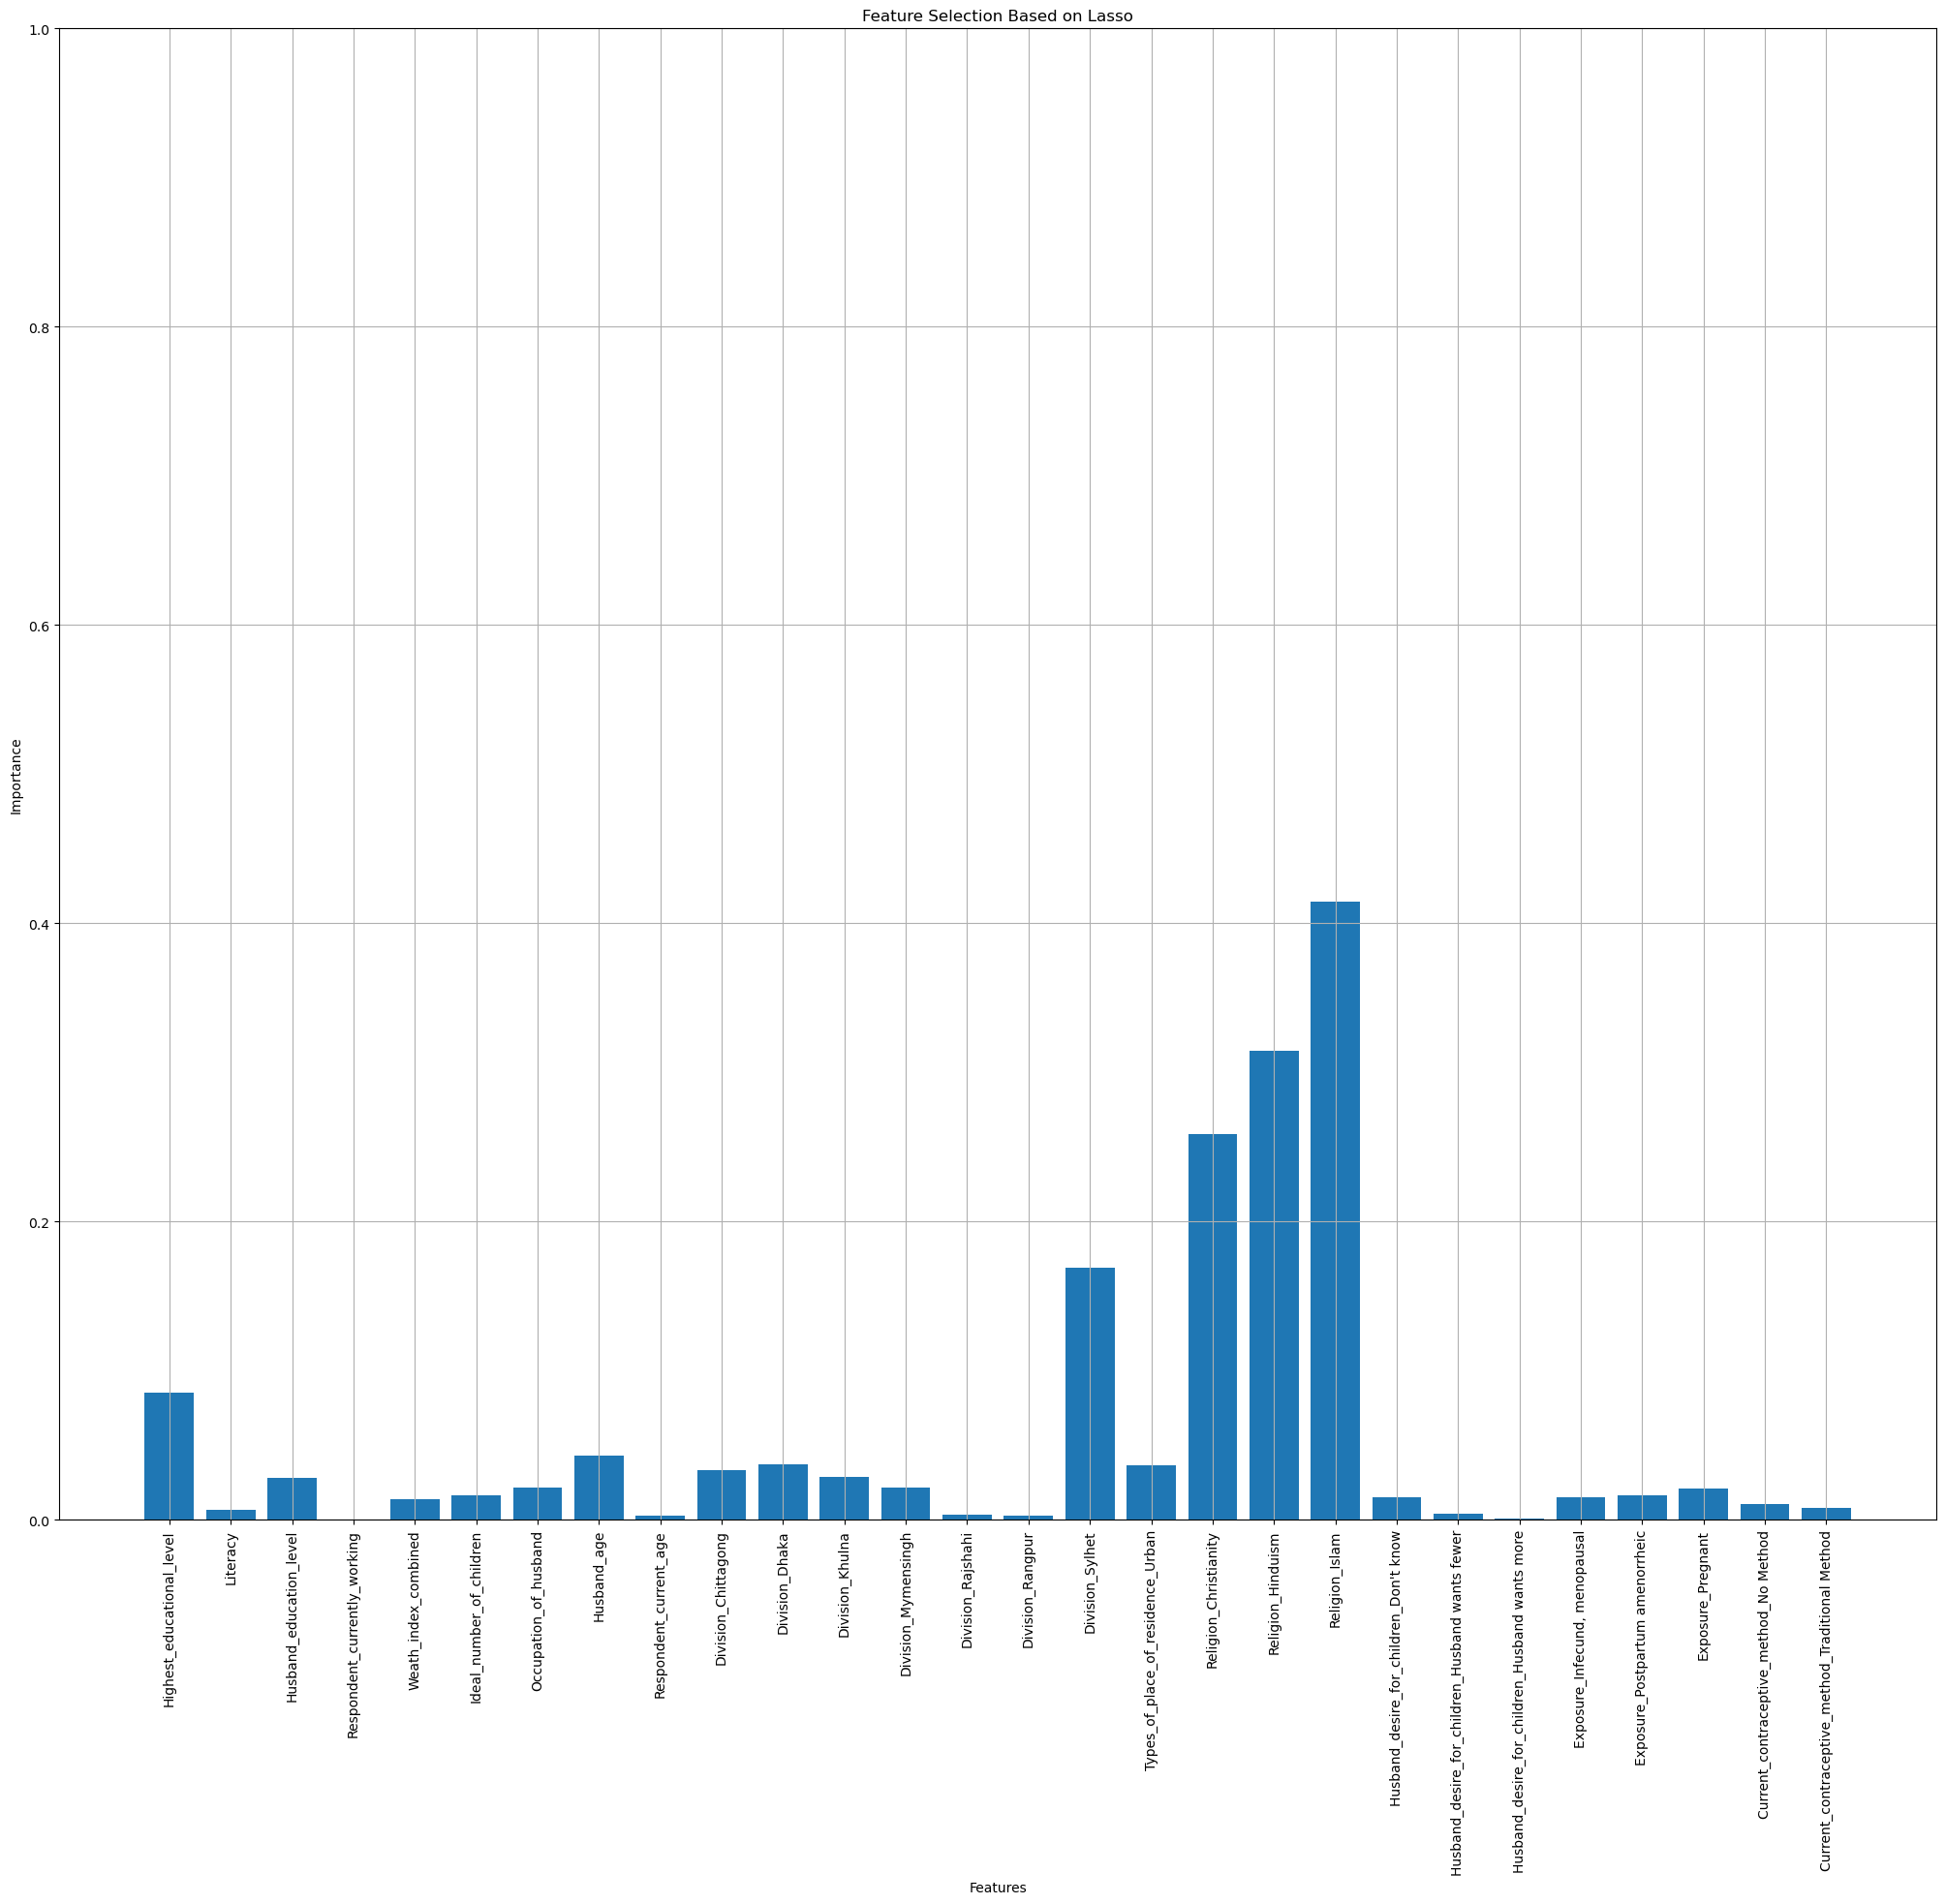

In [34]:
lasso1 = Lasso(alpha=0.00001)
lasso1.fit(X_train_Feature_Selection, y_train_Feature_Selection)

# Using np.abs() to make coefficients positive.  
lasso1_coef = np.abs(lasso1.coef_)

# plotting the Column Names and Importance of Columns.
names=X_train_Feature_Selection.columns
plt.figure(figsize=(25,20))
plt.bar(names, lasso1_coef)
plt.xticks(rotation=90)
plt.grid()
plt.title("Feature Selection Based on Lasso")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.ylim(0,1)
plt.show()

In [35]:
a = pd.DataFrame(data = lasso1_coef,index = names,columns=['Lasso Coefficient Values']) 
Lasso_feature_values=a.sort_values(by='Lasso Coefficient Values',ascending=False)
Lasso_feature_values

,Lasso Coefficient Values
Religion_Islam,0.414539
Religion_Hinduism,0.314656
Religion_Christianity,0.258627
Division_Sylhet,0.168895
Highest_educational_level,0.085543
Husband_age,0.042971
Division_Dhaka,0.037091
Types_of_place_of_residence_Urban,0.036824
Division_Chittagong,0.033422
Division_Khulna,0.028679


In [36]:
Lasso_features=Lasso_feature_values[Lasso_feature_values.values>0.010475]
Lasso_features_columns=Lasso_features.index
Lasso_features_columns

Index(['Religion_Islam', 'Religion_Hinduism', 'Religion_Christianity',
       'Division_Sylhet', 'Highest_educational_level', 'Husband_age',
       'Division_Dhaka', 'Types_of_place_of_residence_Urban',
       'Division_Chittagong', 'Division_Khulna', 'Husband_education_level',
       'Division_Mymensingh', 'Occupation_of_husband', 'Exposure_Pregnant',
       'Ideal_number_of_children', 'Exposure_Postpartum amenorrheic',
       'Exposure_Infecund, menopausal',
       'Husband_desire_for_children_Don't know', 'Weath_index_combined',
       'Current_contraceptive_method_No Method'],
      dtype='object')

# CHI square values 

In [67]:
#Hightes value selected features
from sklearn.feature_selection import chi2
b = pd.DataFrame(data = chi_scores[0],index = names,columns=['Chi square values']) 
b.sort_values(by='Chi square values',ascending=False)

,Chi square values
Highest_educational_level,415.554918
Weath_index_combined,404.012310
Husband_education_level,248.924616
Division_Sylhet,167.087073
Religion_Hinduism,112.996611
Types_of_place_of_residence_Urban,81.169713
"Exposure_Infecund, menopausal",34.345850
Respondent_currently_working,33.841518
Division_Rajshahi,21.560773
Religion_Islam,18.019885


In [68]:
c = pd.DataFrame(data = chi_scores[1],index = names,columns=['Chi square p values values']) 
c.sort_values(by='Chi square p values values',ascending=True)
c
chi_square_feature_names=c.index[0:15]
c.index[0:15]

Index(['Highest_educational_level', 'Literacy', 'Husband_education_level',
       'Respondent_currently_working', 'Weath_index_combined',
       'Ideal_number_of_children', 'Occupation_of_husband', 'Husband_age',
       'Respondent_current_age', 'Division_Chittagong', 'Division_Dhaka',
       'Division_Khulna', 'Division_Mymensingh', 'Division_Rajshahi',
       'Division_Rangpur'],
      dtype='object')

# Accepted Till Division_Rangpur(included) based on P value 0.05

In [65]:
chi_scores = chi2(X_train_Feature_Selection, y_train_Feature_Selection)
chi_scores=np.array(chi_scores)

<Axes: >

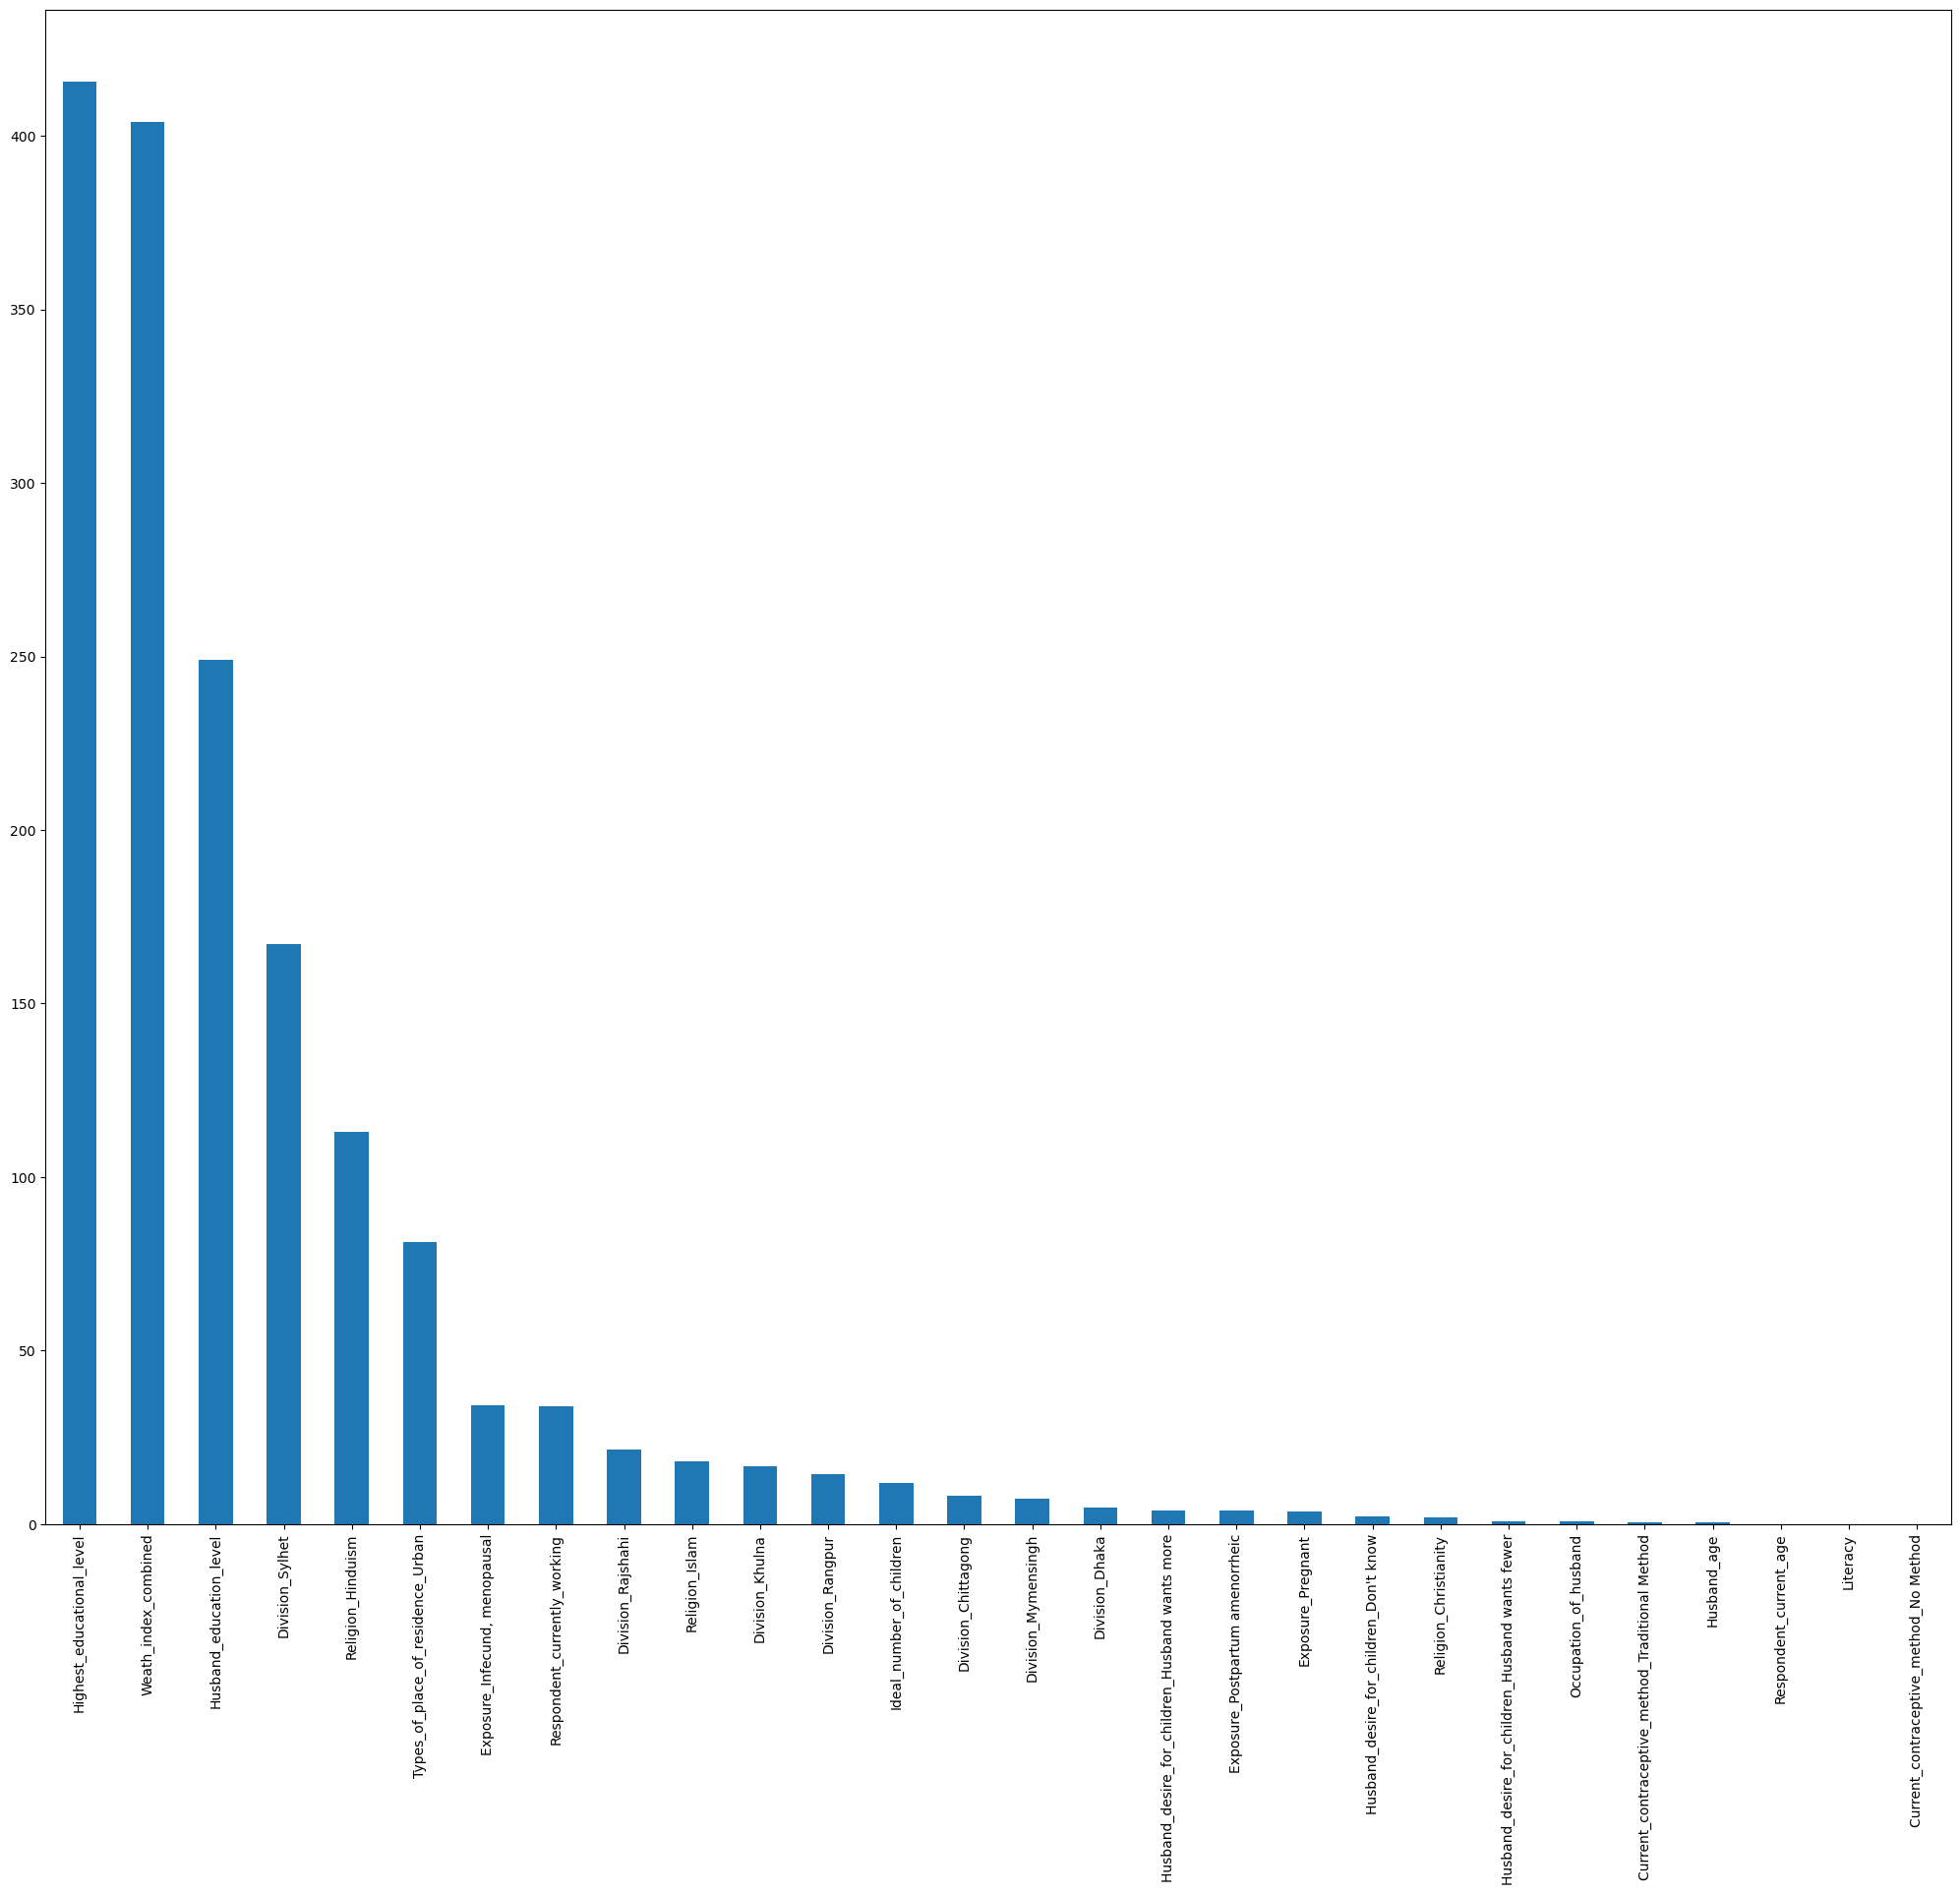

In [66]:
#High value means High importance
plt.figure(figsize=(25,20))
chi_values = pd.Series(chi_scores[0], index=X_train_Feature_Selection.columns)
chi_values.sort_values(ascending=False, inplace=True)
chi_values.plot.bar()

<Axes: >

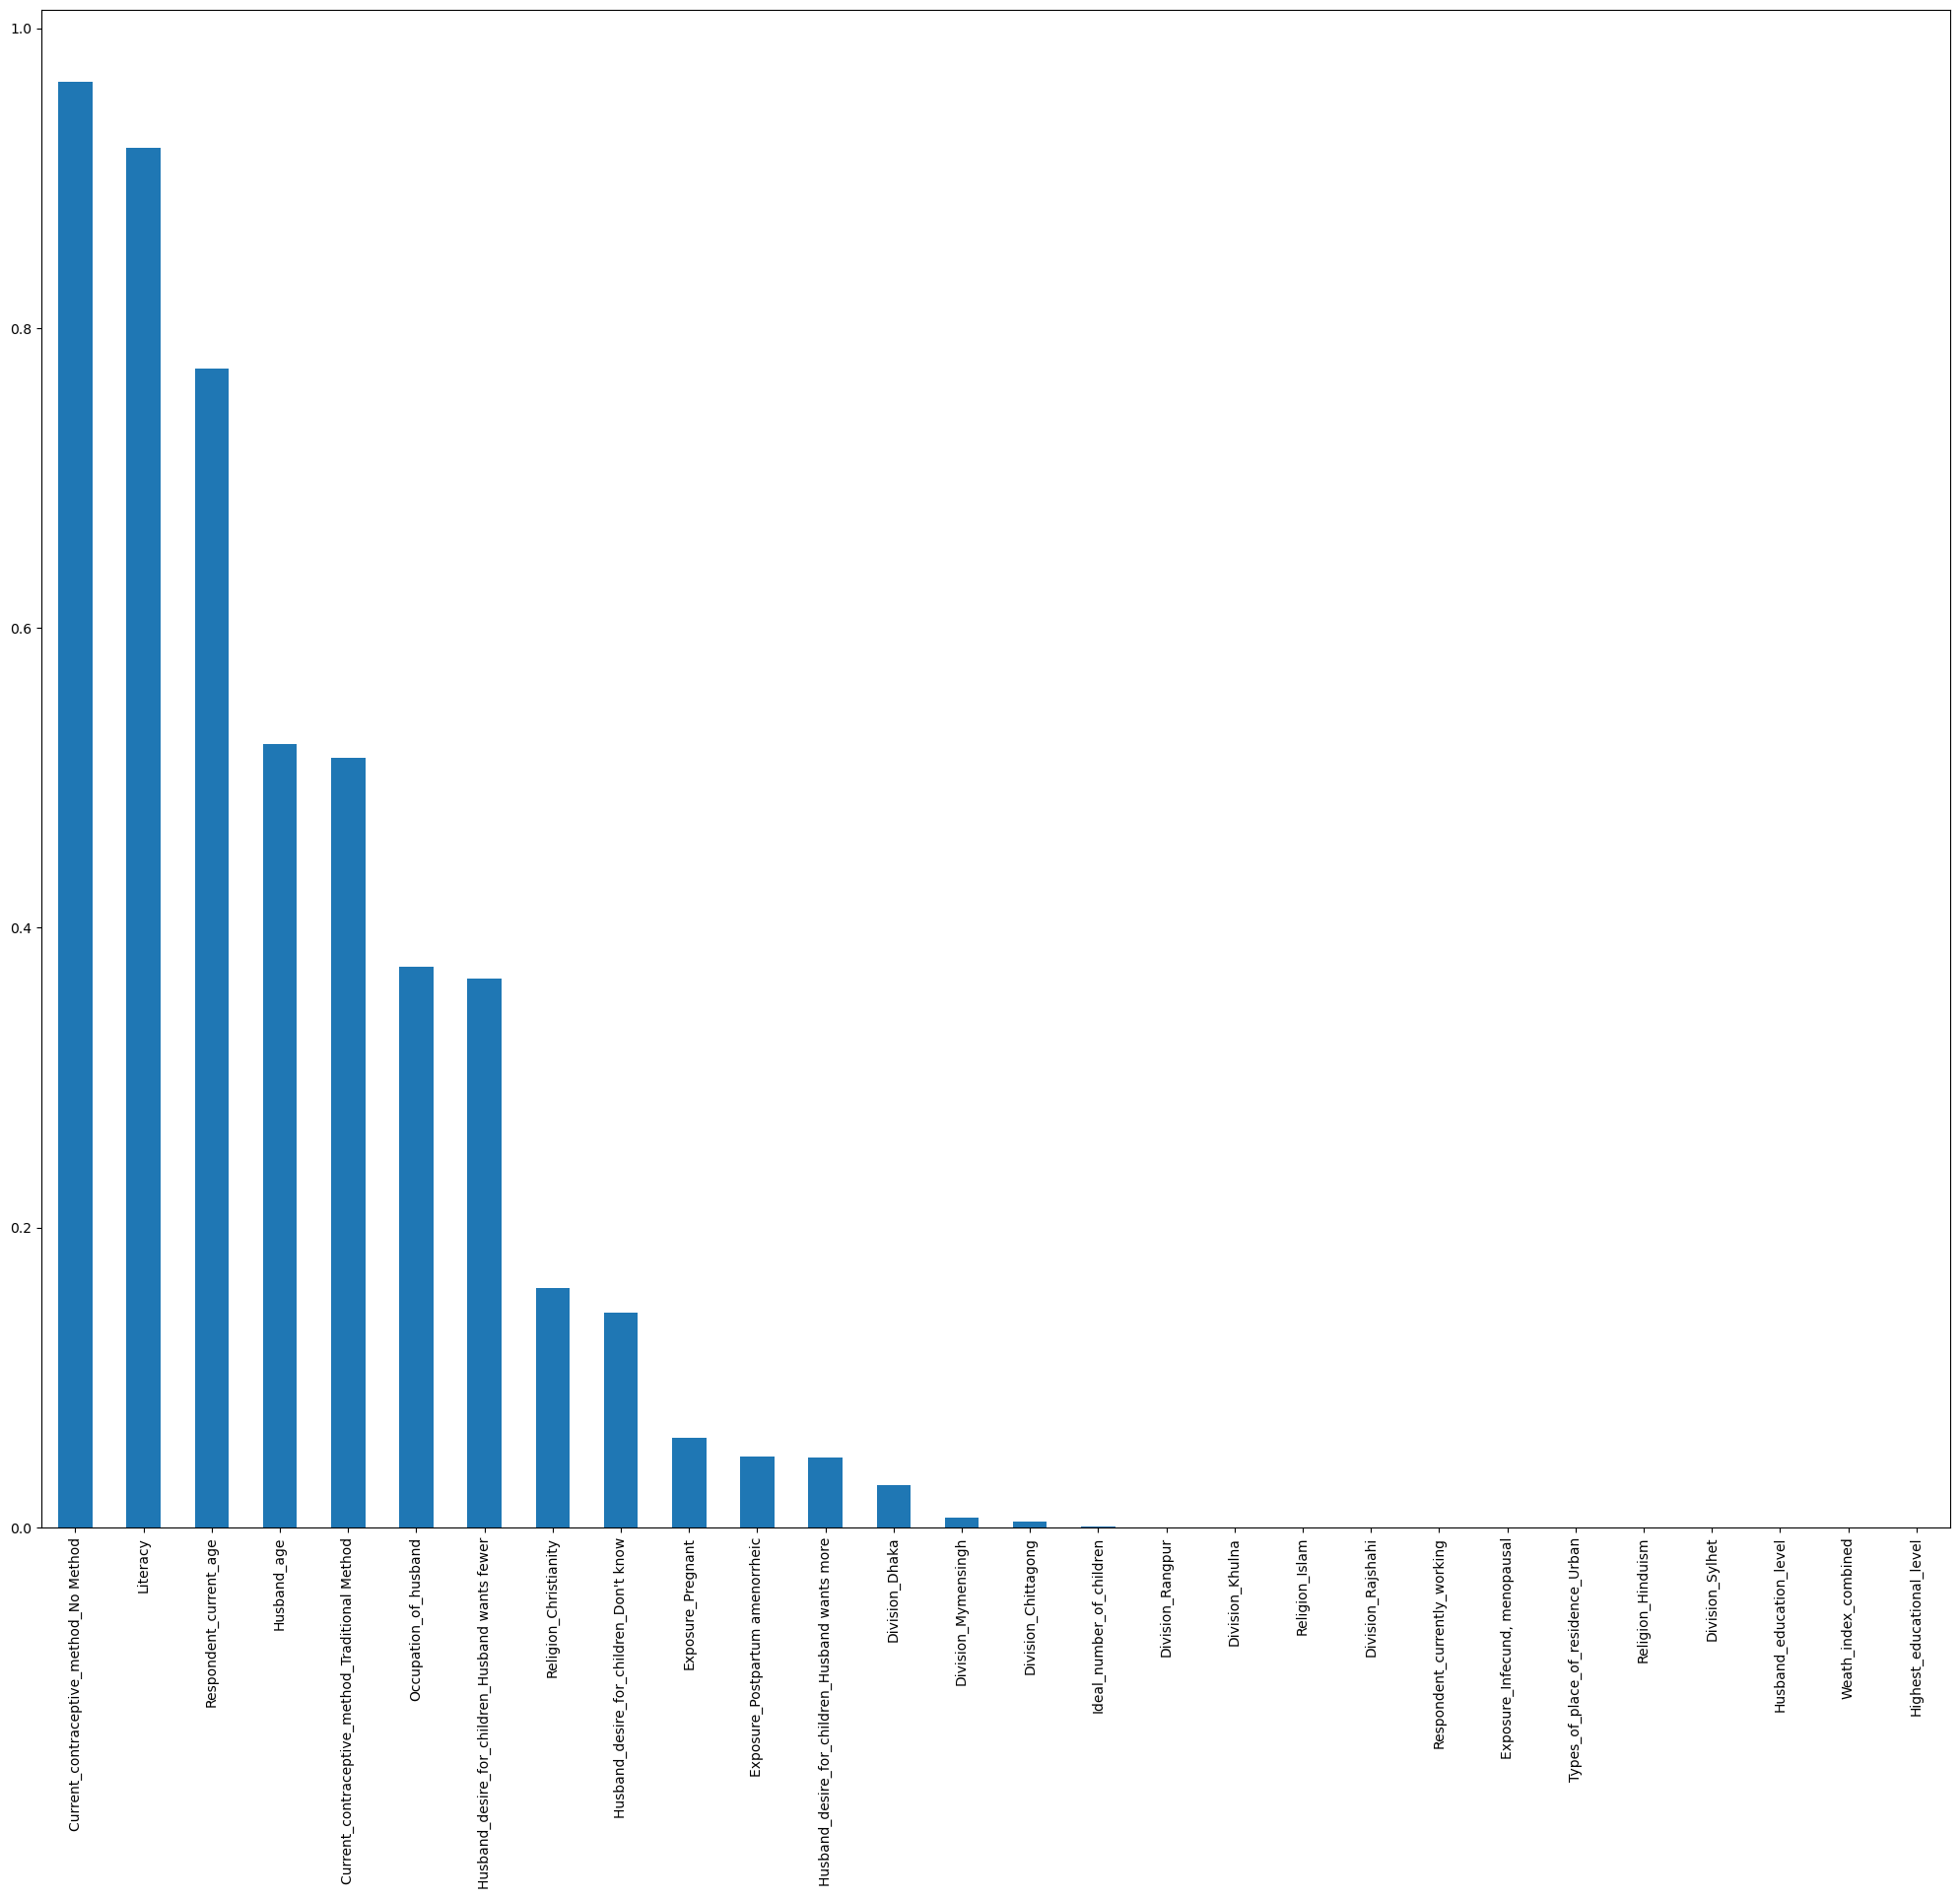

In [69]:
# if p-value > 0.5, lower the importance
plt.figure(figsize=(25,20))
p_values = pd.Series(chi_scores[1], index=X_train_Feature_Selection.columns)
p_values.sort_values(ascending=False, inplace=True)
p_values.plot.bar()

# Boruta 

<img src ="Boruta Early Age Black phot.png">

# R studio Showing not identified features
Husband_desire_for_children,

Ideal_number_of_children,

Occupation_of_husband,

Respondent_currently_working,

# Boruta Feature selection Results from R  

# Boruta Feature selection Results from Python 

In [70]:
!pip install BorutaPy

Defaulting to user installation because normal site-packages is not writeable


ERROR: Could not find a version that satisfies the requirement BorutaPy (from versions: none)
ERROR: No matching distribution found for BorutaPy


In [73]:
# Create a Boruta object with random forest classifier
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier
y_ravel = y_train_Feature_Selection.values.ravel()
x_ravel=X_train_Feature_Selection.values


rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)

boruta = BorutaPy(rf,n_estimators=100, random_state=0)

# Fit Boruta on the data
boruta.fit(x_ravel, y_ravel)

# Get the selected features
selected_features = boruta.support_

# Get the ranking of features
feature_ranks = boruta.ranking_

# Print information about selected features and ranking
#print("Selected Features:", x_ravel.columns[selected_features])
#print("Feature Ranking:", feature_ranks)

In [83]:
h= X_train_Feature_Selection.columns.values
h=pd.DataFrame(h)
pd.DataFrame(data=boruta.ranking_,index=h)

,0
"(Highest_educational_level,)",1
"(Literacy,)",9
"(Husband_education_level,)",1
"(Respondent_currently_working,)",1
"(Weath_index_combined,)",1
"(Ideal_number_of_children,)",4
"(Occupation_of_husband,)",14
"(Husband_age,)",1
"(Respondent_current_age,)",3
"(Division_Chittagong,)",1


# Implimanting Machine Learning Models 

# Oversampled Dataset 

In [148]:
x_test_oversampled=X_before_oversampled_test
y_test_oversampled=y_before_oversampled_test
X=pd.DataFrame(X_train_oversampled)
X=X.append(x_test_oversampled)
y=pd.concat([y_train_oversampled,y_test_oversampled],axis=0)

C:\Users\USER\AppData\Local\Temp\ipykernel_26048\2668592727.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X=X.append(x_test_oversampled)


# Orginal Data 

In [ ]:
total_X
total_y

# Non Ensemble Using Stratified kflod cross validation

# Checking the (Overfitting=Training Accuracy- Test accuracy) using Different dataset 

# Decision Tree for Oversampled data 

In [105]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn import tree


# Define your machine learning model here (e.g., RandomForestClassifier())
model = tree.DecisionTreeClassifier()

# Define stratified k-fold cross-validation
cv = StratifiedKFold(n_splits=5)  # Adjust n_splits as needed

# Track accuracy scores
accuracy_scores = []

# Perform cross-validation loop
for train_idx, test_idx in cv.split(X, y):
  X_train, X_test = X.values[train_idx], X.values[test_idx]
  y_train, y_test = y.values[train_idx], y.values[test_idx]

  # Train the model
  model.fit(X_train, y_train)

  # Evaluate the model on the test set
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  accuracy_scores.append(accuracy)

# Print accuracy scores for each fold and average accuracy
print("Test Accuracy Scores:", accuracy_scores)
print("Test Average Accuracy:", np.mean(accuracy_scores))


Test Accuracy Scores: [0.752793614595211, 0.8433295324971494, 0.8305200729927007, 0.8380474452554745, 0.7691605839416058]
Test Average Accuracy: 0.8067702498564282


# F1 score for Oversampled dataset

In [106]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn import tree


# Define your machine learning model here (e.g., RandomForestClassifier())
model = tree.DecisionTreeClassifier()

# Define stratified k-fold cross-validation
cv = StratifiedKFold(n_splits=5)  # Adjust n_splits as needed

# Track accuracy scores
F1_score = []

# Perform cross-validation loop
for train_idx, test_idx in cv.split(X, y):
  X_train, X_test = X.values[train_idx], X.values[test_idx]
  y_train, y_test = y.values[train_idx], y.values[test_idx]

  # Train the model
  model.fit(X_train, y_train)

  # Evaluate the model on the test set
  y_pred = model.predict(X_test)
  F1_score = f1_score(y_test, y_pred)
  #F1_score.append(F1_score)

# Print accuracy scores for each fold and average accuracy
print("F1_score :", F1_score)
print("Average F1_score:", np.mean(F1_score))

# Having face issue to run the loop 

F1_score : 0.7159152634437806
Average F1_score: 0.7159152634437806


# Decision Tree for Normal data( Raw data) 

In [107]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn import tree


# Define your machine learning model here (e.g., RandomForestClassifier())
model = tree.DecisionTreeClassifier()

# Define stratified k-fold cross-validation
cv = StratifiedKFold(n_splits=5)  # Adjust n_splits as needed

# Track accuracy scores
accuracy_scores = []

# Perform cross-validation loop
for train_idx, test_idx in cv.split(total_X,total_y):
  X_train, X_test = X.values[train_idx], X.values[test_idx]
  y_train, y_test = y.values[train_idx], y.values[test_idx]

  # Train the model
  model.fit(X_train, y_train)

  # Evaluate the model on the test set
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  accuracy_scores.append(accuracy)

# Print accuracy scores for each fold and average accuracy
print("Test Accuracy Scores:", accuracy_scores)
print("Test Average Accuracy:", np.mean(accuracy_scores))


Test Accuracy Scores: [0.7465124191902007, 0.765226267437904, 0.7460857726344452, 0.8053097345132744, 0.7562968005445881]
Test Average Accuracy: 0.7638861988640826


# Checking the Overfitting using Accuracy using Chi square dataset 

In [108]:
X_After_chi_sqUare_feature_selection=X[['Highest_educational_level', 'Literacy', 'Husband_education_level',
       'Respondent_currently_working', 'Weath_index_combined',
       'Ideal_number_of_children', 'Occupation_of_husband', 'Husband_age',
       'Respondent_current_age', 'Division_Chittagong', 'Division_Dhaka',
       'Division_Khulna', 'Division_Mymensingh', 'Division_Rajshahi',
       'Division_Rangpur']]

In [109]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn import tree


# Define your machine learning model here (e.g., RandomForestClassifier())
model = tree.DecisionTreeClassifier()

# Define stratified k-fold cross-validation
cv = StratifiedKFold(n_splits=5)  # Adjust n_splits as needed

# Track accuracy scores
accuracy_scores = []

# Perform cross-validation loop
for train_idx, test_idx in cv.split(X_After_chi_sqUare_feature_selection, y):
  X_train, X_test = X_After_chi_sqUare_feature_selection.values[train_idx], X_After_chi_sqUare_feature_selection.values[test_idx]
  y_train, y_test = y.values[train_idx], y.values[test_idx]

  # Train the model
  model.fit(X_train, y_train)

  # Evaluate the model on the test set
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  accuracy_scores.append(accuracy)

# Print accuracy scores for each fold and average accuracy
print("Test Accuracy Scores:", accuracy_scores)
print("Test Average Accuracy:", np.mean(accuracy_scores))


Test Accuracy Scores: [0.752793614595211, 0.8143671607753706, 0.8104470802919708, 0.8129562043795621, 0.7572992700729927]
Test Average Accuracy: 0.7895726660230215


# Check the overfitting 

# Check for Chi Square features + Oversampled Data 

In [110]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn import tree


# Define your machine learning model here (e.g., RandomForestClassifier())
model = tree.DecisionTreeClassifier()

# Define stratified k-fold cross-validation
cv = StratifiedKFold(n_splits=5)  # Adjust n_splits as needed

# Track accuracy scores
accuracy_scores = []

# Perform cross-validation loop
for train_idx, test_idx in cv.split(X_After_chi_sqUare_feature_selection, y):
  X_train, X_test = X_After_chi_sqUare_feature_selection.values[train_idx], X_After_chi_sqUare_feature_selection.values[test_idx]
  y_train, y_test = y.values[train_idx], y.values[test_idx]

  # Train the model
  model.fit(X_train, y_train)

 # Evaluate the model on the test set
  y_train_pred=model.predict(X_train)
  accuracy = accuracy_score(y_train, y_train_pred)
  accuracy_scores.append(accuracy)

# Print accuracy scores for each fold and average accuracy
print("Training Accuracy Scores:", accuracy_scores)
print("Training Average Accuracy:", np.mean(accuracy_scores))


Training Accuracy Scores: [0.9006101385641786, 0.8910874151793351, 0.8920629490249743, 0.8941156346219638, 0.8998175390580454]
Training Average Accuracy: 0.8955387352896995


In [111]:
print("The differenct in Chi_square  feature selection : ",0.8955387352896995-0.7887516125810452)

The differenct in Chi_square  feature selection :  0.10678712270865431


# Lasso features check the accuracy + oversampled Data

In [112]:
X_After_Lasso_feature_selection=X[['Religion_Islam', 'Religion_Hinduism', 'Religion_Christianity',
       'Division_Sylhet', 'Highest_educational_level', 'Husband_age',
       'Division_Dhaka', 'Types_of_place_of_residence_Urban',
       'Division_Chittagong', 'Division_Khulna', 'Husband_education_level',
       'Division_Mymensingh', 'Occupation_of_husband', 'Exposure_Pregnant',
       'Ideal_number_of_children', 'Exposure_Postpartum amenorrheic',
       'Exposure_Infecund, menopausal',
       'Husband_desire_for_children_Don\'t know', 'Weath_index_combined',
       'Current_contraceptive_method_No Method']]

In [113]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn import tree


# Define your machine learning model here (e.g., RandomForestClassifier())
model= tree.DecisionTreeClassifier()

# Define stratified k-fold cross-validation
cv = StratifiedKFold(n_splits=5)  # Adjust n_splits as needed

# Track accuracy scores
accuracy_scores = []

# Perform cross-validation loop
for train_idx, test_idx in cv.split(X_After_Lasso_feature_selection, y):
  X_train, X_test = X_After_Lasso_feature_selection.values[train_idx], X_After_Lasso_feature_selection.values[test_idx]
  y_train, y_test = y.values[train_idx], y.values[test_idx]

  # Train the model
  model.fit(X_train, y_train)

  # Evaluate the model on the test set
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  accuracy_scores.append(accuracy)

# Print accuracy scores for each fold and average accuracy
print("Test Accuracy Scores:", accuracy_scores)
print("Test Average Accuracy:", np.mean(accuracy_scores))

Test Accuracy Scores: [0.7345496009122007, 0.7815279361459521, 0.7839872262773723, 0.7798813868613139, 0.7322080291970803]
Test Average Accuracy: 0.7624308358787838


# Check the overfitting

In [114]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn import tree


# Define your machine learning model here (e.g., RandomForestClassifier())
model= tree.DecisionTreeClassifier()

# Define stratified k-fold cross-validation
cv = StratifiedKFold(n_splits=5)  # Adjust n_splits as needed

# Track accuracy scores
accuracy_scores = []

# Perform cross-validation loop
for train_idx, test_idx in cv.split(X_After_Lasso_feature_selection, y):
  X_train, X_test = X_After_Lasso_feature_selection.values[train_idx], X_After_Lasso_feature_selection.values[test_idx]
  y_train, y_test = y.values[train_idx], y.values[test_idx]

  # Train the model
  model.fit(X_train, y_train)

 # Evaluate the model on the test set
  y_train_pred=model.predict(X_train)
  accuracy = accuracy_score(y_train, y_train_pred)
  accuracy_scores.append(accuracy)

# Print accuracy scores for each fold and average accuracy
print("Training Accuracy Scores:", accuracy_scores)
print("Training Average Accuracy:", np.mean(accuracy_scores))


Training Accuracy Scores: [0.8586417289160062, 0.858356617437418, 0.8569392176987114, 0.8577945033641237, 0.8622990078686281]
Training Average Accuracy: 0.8588062150569776


In [115]:
print("The differenct in Lasso feature selection : ",0.8588062150569776-0.7628869466246078)

The differenct in Lasso feature selection :  0.09591926843236986


# Check overfitting(training Accuracy) Oversampled dataset without feature selection 

In [120]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn import tree


# Define your machine learning model here (e.g., RandomForestClassifier())
model = model= tree.DecisionTreeClassifier()

# Define stratified k-fold cross-validation
cv = StratifiedKFold(n_splits=5)  # Adjust n_splits as needed

# Track accuracy scores
accuracy_scores = []

# Perform cross-validation loop
for train_idx, test_idx in cv.split(X, y):
  X_train, X_test = X.values[train_idx], X.values[test_idx]
  y_train, y_test = y.values[train_idx], y.values[test_idx]

  # Train the model
  model.fit(X_train, y_train)

  # Evaluate the model on the test set
  y_train_pred=model.predict(X_train)
  accuracy = accuracy_score(y_train, y_train_pred)
  accuracy_scores.append(accuracy)

# Print accuracy scores for each fold and average accuracy
print("Training Accuracy Scores:", accuracy_scores)
print("training Average Accuracy:", np.mean(accuracy_scores))


Training Accuracy Scores: [0.9770770371215145, 0.9746821007013743, 0.9740563348158285, 0.9749686395256015, 0.9772494013000342]
training Average Accuracy: 0.9756067026928706


In [117]:
print("The differenct in oversampled data without feature selection : ", 0.9756067026928706-0.8062685394801455)

The differenct in oversampled data without feature selection :  0.1693381632127251


# Check With normal data

In [118]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn import tree


# Define your machine learning model here (e.g., RandomForestClassifier())
model = model= tree.DecisionTreeClassifier()

# Define stratified k-fold cross-validation
cv = StratifiedKFold(n_splits=5)  # Adjust n_splits as needed

# Track accuracy scores
accuracy_scores = []

# Perform cross-validation loop
for train_idx, test_idx in cv.split(total_X,total_y):
  X_train, X_test = total_X.values[train_idx], total_X.values[test_idx]
  y_train, y_test = total_y.values[train_idx], total_y.values[test_idx]

  # Train the model
  model.fit(X_train, y_train)

  # Evaluate the model on the test set
  y_train_pred=model.predict(X_train)
  accuracy = accuracy_score(y_train, y_train_pred)
  accuracy_scores.append(accuracy)

# Print accuracy scores for each fold and average accuracy
print("Accuracy Scores:", accuracy_scores)
print("Average Accuracy:", np.mean(accuracy_scores))

Accuracy Scores: [0.9832383221305199, 0.983068152812048, 0.9843457546367194, 0.9839203675344563, 0.9822188191254041]
Average Accuracy: 0.9833582832478296


In [119]:
print("The differenct in Normal data without feature selection : ",0.9833582832478296-0.7663363128333757)

The differenct in Normal data without feature selection :  0.21702197041445392


# Results of all dataset after testing the Overfitting on  Decession Tree Algorithms

# Lowest Overfitting Obsered from Lasso + oversampled data use these feature for another Models 

# SVM

# Ravel used for convert array 
y_test_ML.values.ravel()

In [121]:
""" 
from sklearn.svm import SVC
svm_model = SVC(kernel="linear", probability=True)

svm_model.fit(X_train_ML, y_train_ML)

# Multinomial CLassifier
# Predict the test set results
pred_y_svm= svm_model.predict(X_test_ML)
print("Normal accuracy: ", accuracy_score(y_test_ML, pred_y_svm))
print(classification_report(y_test_ML.values.ravel(),pred_y_svm))
"""

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC


# Define your machine learning model here (e.g., RandomForestClassifier())
model= SVC(kernel="linear", probability=True)

# Define stratified k-fold cross-validation
cv = StratifiedKFold(n_splits=5)  # Adjust n_splits as needed

# Track accuracy scores
accuracy_scores = []

# Perform cross-validation loop
for train_idx, test_idx in cv.split(X_After_Lasso_feature_selection, y):
  X_train, X_test = X_After_Lasso_feature_selection.values[train_idx], X_After_Lasso_feature_selection.values[test_idx]
  y_train, y_test = y.values[train_idx], y.values[test_idx]

  # Train the model
  model.fit(X_train, y_train)

  # Evaluate the model on the test set
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  accuracy_scores.append(accuracy)

# Print accuracy scores for each fold and average accuracy
print("Test Accuracy Scores:", accuracy_scores)
print("Test Average Accuracy:", np.mean(accuracy_scores))

C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed w

Test Accuracy Scores: [0.6946408209806157, 0.7254275940706956, 0.740191605839416, 0.729242700729927, 0.7226277372262774]
Test Average Accuracy: 0.7224260917693864


In [126]:
'''#Cohen Kappa Score's 
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test_ML['Age at Early Marrige'],pred_y_svm)
'''

"#Cohen Kappa Score's \nfrom sklearn.metrics import cohen_kappa_score\ncohen_kappa_score(y_test_ML['Age at Early Marrige'],pred_y_svm)\n"

In [123]:
#print(pd.crosstab(y_test_ML.values.ravel(), pred_y_svm))

# Naive Bayes

In [132]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB ,BernoulliNB



# Define your machine learning model here (e.g., RandomForestClassifier())
Nb_model=BernoulliNB()

# Define stratified k-fold cross-validation
cv = StratifiedKFold(n_splits=5)  # Adjust n_splits as needed

# Track accuracy scores
accuracy_scores = []

# Perform cross-validation loop
for train_idx, test_idx in cv.split(X_After_Lasso_feature_selection, y):
  X_train, X_test = X_After_Lasso_feature_selection.values[train_idx], X_After_Lasso_feature_selection.values[test_idx]
  y_train, y_test = y.values[train_idx], y.values[test_idx]

  # Train the model
  Nb_model.fit(X_train, y_train)

  # Evaluate the model on the test set
  y_pred = Nb_model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  accuracy_scores.append(accuracy)

# Print accuracy scores for each fold and average accuracy
print("Test Accuracy Scores:", accuracy_scores)
print("Test Average Accuracy:", np.mean(accuracy_scores))

Test Accuracy Scores: [0.6234891676168757, 0.6622576966932725, 0.667655109489051, 0.6576186131386861, 0.65625]
Test Average Accuracy: 0.6534541173875771


C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed w

# Roc curve Naive Bayes

# Ensumbel Method

# Random Forest

In [130]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier


# Define your machine learning model here (e.g., RandomForestClassifier())
model = RandomForestClassifier(criterion='gini',min_samples_leaf=200)


# Define stratified k-fold cross-validation
cv = StratifiedKFold(n_splits=5)  # Adjust n_splits as needed

# Track accuracy scores
accuracy_scores = []

# Perform cross-validation loop
for train_idx, test_idx in cv.split(X_After_Lasso_feature_selection, y):
  X_train, X_test = X_After_Lasso_feature_selection.values[train_idx], X_After_Lasso_feature_selection.values[test_idx]
  y_train, y_test = y.values[train_idx], y.values[test_idx]

  # Train the model
  model.fit(X_train, y_train)

  # Evaluate the model on the test set
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  accuracy_scores.append(accuracy)

# Print accuracy scores for each fold and average accuracy
print("Test Accuracy Scores:", accuracy_scores)
print("Test Average Accuracy:", np.mean(accuracy_scores))

C:\Users\USER\AppData\Local\Temp\ipykernel_26048\4245851438.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)
C:\Users\USER\AppData\Local\Temp\ipykernel_26048\4245851438.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)
C:\Users\USER\AppData\Local\Temp\ipykernel_26048\4245851438.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)
C:\Users\USER\AppData\Local\Temp\ipykernel_26048\4245851438.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y

Test Accuracy Scores: [0.7265678449258837, 0.7236031927023945, 0.7214872262773723, 0.7173813868613139, 0.7331204379562044]
Test Average Accuracy: 0.7244320177446337


In [ ]:
X=total_X
y=total_y.values.ravel()
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
Rm_model = RandomForestClassifier(criterion='gini',
                              min_samples_leaf=200
                              )
# Fit the model
clf = Rm_model.fit(x_train, y_train)
# Predict class labels on a test data
y_pred_rm = Rm_model.predict(x_test)
print('*************** Evaluation on Test Data ***************')
score_te_rm = accuracy_score(y_test, y_pred_rm)
print('Accuracy Score: ', score_te_rm)

In [ ]:
y_test=pd.DataFrame(y_test)
y_pred_rm=pd.DataFrame(y_pred_rm)

In [ ]:
# Look at classification report to evaluate the model
print(classification_report(y_test, y_pred_rm))

In [ ]:
pd.crosstab(y_test.values,y_pred_rm.values)

In [ ]:
#Cross Validation
from sklearn.model_selection import cross_val_score
scores_Carrt=cross_val_score(Rm_model,X, y["Age at Early Marrige"],cv=10,scoring='accuracy')
print(scores_Carrt.mean())

# PCA DATA Adaboost [Avoid theis one for checking the better Result]

In [133]:
#PCA 
from sklearn.decomposition import PCA
pca= PCA(n_components=2)
pca.fit(total_X)

PCA(n_components=2)

In [134]:
x_pca=pca.transform(total_X)
X=x_pca
X

array([[-1.81598611, -0.59227626],
       [-1.81870721, -0.77056984],
       [ 3.58261107, -1.5705676 ],
       ...,
       [ 2.64114002, -1.15474762],
       [-1.79991726, -0.89814021],
       [-1.82180559, -0.38019461]])

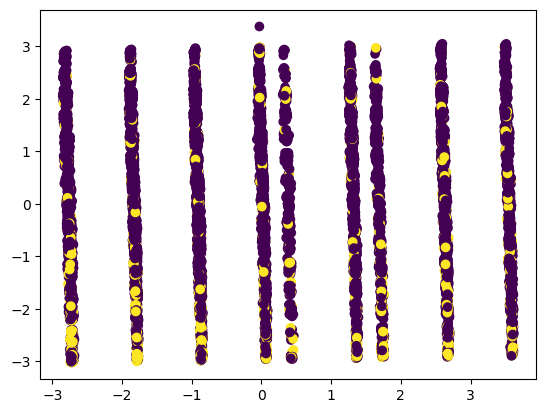

In [135]:
plt.scatter(x_pca[:,0],x_pca[:,1],c=total_y.values)

# Normal Data ADABOOST

In [141]:
X_adaboost=total_X
y_adaboost=total_y.values.ravel()

# Using Raw data check the accuracy 

In [142]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

abc = AdaBoostClassifier()

np.mean(cross_val_score(abc,X_adaboost,y_adaboost,scoring='accuracy',cv=10))

0.8591749211597506

# Using Lasso feature selection data check the accuracy 


In [149]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB ,BernoulliNB


# Define your machine learning model here (e.g., RandomForestClassifier())
abc = AdaBoostClassifier()

# Define stratified k-fold cross-validation
cv = StratifiedKFold(n_splits=5)  # Adjust n_splits as needed

# Track accuracy scores
accuracy_scores = []

# Perform cross-validation loop
for train_idx, test_idx in cv.split(X_After_Lasso_feature_selection, y):
  X_train, X_test = X_After_Lasso_feature_selection.values[train_idx], X_After_Lasso_feature_selection.values[test_idx]
  y_train, y_test = y.values[train_idx], y.values[test_idx]

  # Train the model
  abc.fit(X_train, y_train)

  # Evaluate the model on the test set
  y_pred = abc.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  accuracy_scores.append(accuracy)

# Print accuracy scores for each fold and average accuracy
print("Test Accuracy Scores:", accuracy_scores)
print("Test Average Accuracy:", np.mean(accuracy_scores))

C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed w

Test Accuracy Scores: [0.7126567844925884, 0.7322690992018244, 0.7481751824817519, 0.7312956204379562, 0.7356295620437956]
Test Average Accuracy: 0.7320052497315833


In [144]:
from sklearn.model_selection import GridSearchCV

grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
grid['algorithm'] = ['SAMME', 'SAMME.R']


grid_search = GridSearchCV(estimator=abc, param_grid=grid, n_jobs=-1, cv=10, scoring='accuracy')
# execute the grid search
grid_result = grid_search.fit(X, y)
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.860060 using {'algorithm': 'SAMME.R', 'learning_rate': 0.1, 'n_estimators': 100}


# XGBOOST

In [150]:
X_XGboost=total_X
y_XGboost=total_y.values.ravel()
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

# Using Row data

In [151]:
from xgboost import XGBClassifier
model = XGBClassifier()
result= model.fit(X,y)
y_predict=model.predict(x_test)
y_train_predict=model.predict(x_train)
print("Train accuracy", accuracy_score(y_train,y_train_predict))
print("Tesr accuracy", accuracy_score(y_test,y_predict))

Train accuracy 0.8714890843923102
Tesr accuracy 0.879732400790634


# Using Lasso Feature selected data

In [152]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB ,BernoulliNB


# Define your machine learning model here (e.g., RandomForestClassifier())
abc = AdaBoostClassifier()

# Define stratified k-fold cross-validation
cv = StratifiedKFold(n_splits=5)  # Adjust n_splits as needed

# Track accuracy scores
accuracy_scores = []

# Perform cross-validation loop
for train_idx, test_idx in cv.split(X_After_Lasso_feature_selection, y):
  X_train, X_test = X_After_Lasso_feature_selection.values[train_idx], X_After_Lasso_feature_selection.values[test_idx]
  y_train, y_test = y.values[train_idx], y.values[test_idx]

  # Train the model
  abc.fit(X_train, y_train)

  # Evaluate the model on the test set
  y_pred = abc.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  accuracy_scores.append(accuracy)

# Print accuracy scores for each fold and average accuracy
print("Test Accuracy Scores:", accuracy_scores)
print("Test Average Accuracy:", np.mean(accuracy_scores))

C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed w

Test Accuracy Scores: [0.7126567844925884, 0.7322690992018244, 0.7481751824817519, 0.7312956204379562, 0.7356295620437956]
Test Average Accuracy: 0.7320052497315833
